In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 데이터 가져오기

In [2]:
train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [3]:
#'datetime' column을 datetime 형으로 변환
train['datetime'] = pd.to_datetime(train['datetime'])

# 연,월,일,시,분,초 column추가
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0


# year, month, day, hour, minute, second 데이터 개수 시각화하기

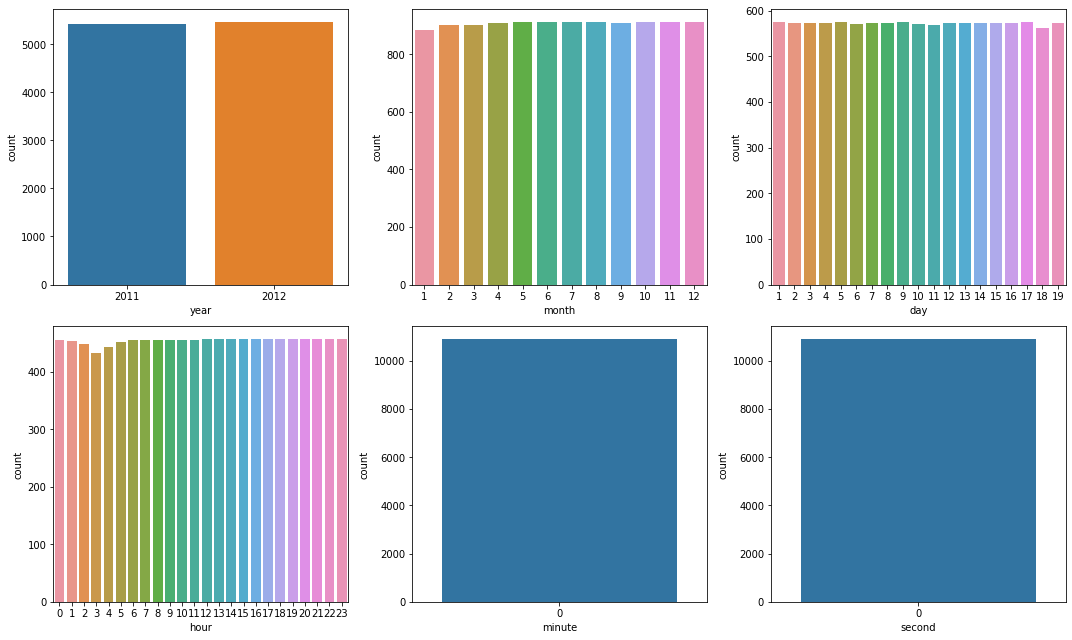

In [4]:
date_features=['year', 'month', 'day', 'hour', 'minute', 'second']

plt.figure(figsize=(15,9))
for i,feature in enumerate(date_features):
    plt.subplot(2,3,i+1)
    sns.countplot(data=train,x=feature)
    
plt.tight_layout()
plt.show()

# X, y 컬럼 선택

In [5]:
# datetime drop
features = ['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second']

In [6]:
# drop 변수 선택
drop_col = ['datetime','casual', 'registered','minute','second','count']
X = train[features].drop(drop_col,axis=1)

In [7]:
y = train['count']

# train/test 데이터 분리

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8708, 12) (8708,)
(2178, 12) (2178,)


# LinearRegression 모델 학습

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산


In [10]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse:.5f}")
print(f"Root Mean Squared Error: {rmse:.5f}")

Mean Squared Error: 19945.37005
Root Mean Squared Error: 141.22808


# x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

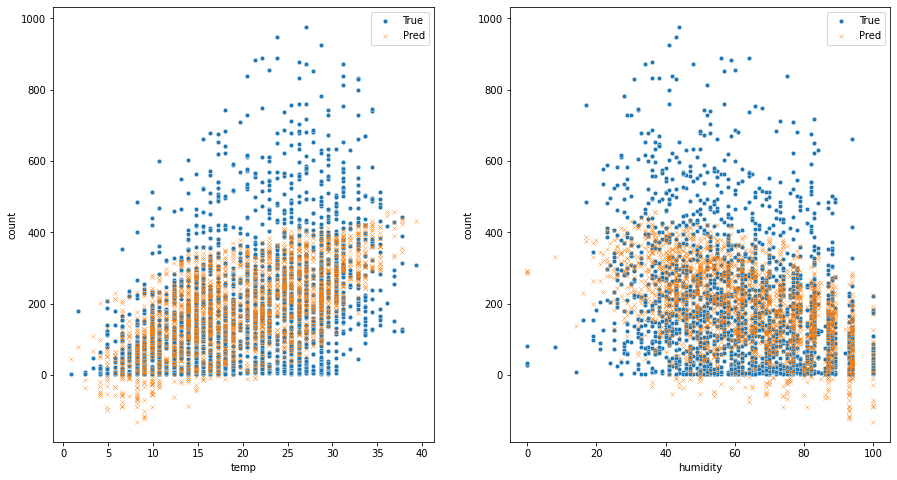

In [11]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.scatterplot(x=X_test['temp'],y=y_test,label='True',s=20)
sns.scatterplot(x=X_test['temp'],y=y_pred,label='Pred',s=20, marker='x')
plt.legend()

plt.subplot(1,2,2)
sns.scatterplot(x=X_test['humidity'],y=y_test,label='True',s=20)
sns.scatterplot(x=X_test['humidity'],y=y_pred, label='Pred',s=20, marker='x')
plt.legend()

plt.show()